In [33]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
from matplotlib import pyplot as plt
import sys
import os 
import fnmatch
sys.path.insert(1, r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\utils")
sys.path.insert(1, r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\tracking")
sys.path.insert(1, r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\muon_decay")
from track import Track
#from track3D import Track3D
from hit import Hit
from data_loading import *
from parameters import *
#from tqdm import tqdm
from track_reconstruction import plot_hits
#from physics import dist_line_rect
#import pickle
from IPython import display
from find_muon_decay_Kim import find_muon_decay_kim


In [34]:
# Define the paths needed
raw_data_directory = r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\\" #path to the ecal data
current_directory = os.getcwd()
data_storage = current_directory+r"\extracted_data"
runs = []  # List of the runs to analyse. If empty, the program will go through all the data available in the raw_data directory
suffix = "" # If one wants to re-run on already analysed data without overwriting the extracted data
separator = "\\" # "/" if linux or mac

In [35]:
# Analyse data
if len(runs) == 0:
    runs = fnmatch.filter(os.listdir(raw_data_directory), '*')

for run in runs:
    print(raw_data_directory +run)
    df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+"\\")
    
    print(df_hits, "raw_data_directory")
    _, _ = find_muon_decay_kim(df_hits,df_hits_total, save_indices = True, save_time_intervals=True, save_hits = True, save_stats = True, \
                    run_name = "_"+run, storage_dir = data_storage, \
                    return_stats = False)

    


C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\\data_0000
selected 51.28% of all events
      evt_timestamp  evt_number  evt_flags  n_hits  \
0          23612625           0  134217728      10   
1          27275293           1  134217728      11   
5          41730672           5  134217728      13   
6          42550820           6  134217728      10   
7          44627144           7  134217728      11   
...             ...         ...        ...     ...   
2614     9735027210        2614  134217728      14   
2616     9753486210        2616  134217728      17   
2618     9764808499        2618  134217728      17   
2619     9765954673        2619  134217728      15   
2620     9770962109        2620  134217728      13   

                                              tofpet_id  \
0                        [0, 1, 4, 2, 2, 1, 0, 0, 3, 2]   
1                     [6, 7, 1, 5, 6, 4, 4, 4, 3, 4, 6]   
5               [6, 4, 2, 1, 2, 1, 0, 6, 3, 0, 4, 2,

TypeError: 'module' object is not callable

In [37]:
# Load of the data frame to visualize the decays
run = "run_000002"

# Load the data
df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+"\\")


selected 50.14% of all events


In [40]:

good_candidates = np.loadtxt(data_storage+"dta_events_indices\\"+run+".txt")

FileNotFoundError: c:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\muon_decay\extracted_datadta_events_indices\run_000002.txt not found.

In [ ]:
#This cell allows to plot the final candidates for muon decay (original track + next event)
#press enter to plot the next candidate, press and caracter + enter to stop the loop
%matplotlib inline

i = 0

kb = ""
while kb == "":
    event = df_hits.loc[good_candidates[i]]
    next_event = df_hits_total.loc[good_candidates[i]+1]

    hits = [Hit(event,i) for i in range(event['n_hits'
    
    ])]
    hitsX = [h for h in hits if h.is_sidex]
    hits_next_event = [Hit(next_event,i) for i in range(next_event['n_hits'])]
    hitsX_next_event = [h for h in hits_next_event if h.is_sidex]

    track = Track(hitsX)
    fig,ax = plot_hits(hits,True,True,scaling = 0.5,hits_next = hits_next_event)
    z = np.linspace(0,16)
    x = track.t*z+track.x0
    ax.plot(x,z,'r-')
    display.clear_output(wait=False)
    print("i = ", i)
    print(hits_next_event[0].timestamp_event-hits_next_event[0].timestamp-hits[-1].timestamp_event+hits[-1].timestamp)
    fig.savefig("fig_muon_decay_problem.pdf".format(i))
    display.display(fig)
    kb = input()
    i = i+1

display.clear_output(wait=False)

In [ ]:
filtering = pd.read_pickle(data_storage+"filtering_data"+run)
og_len = filtering['og_len'][0]
new_len = filtering['new_len'][0]
low_number = filtering['low_number'][0]
bottom_touch = filtering['bottom_touch'][0]
side_touch = filtering['side_touch'][0]
bad_fit = filtering['bad_fit'][0]
too_large_time_interval = filtering['too_large_time_interval'][0]
hits_far_from_track = filtering['hits_far_from_track'][0]
no_spacial_correlation = filtering['no_spacial_correlation'][0]

In [44]:
# Stats on the whole set of analysed data
og_len = 0
new_len = 0
low_number = 0
bottom_touch = 0
side_touch = 0
bad_fit = 0
too_large_time_interval = 0
hits_far_from_track = 0
no_spacial_correlation = 0

n_good_candidates = 0

runs = fnmatch.filter(os.listdir(raw_data_directory))#, '*')
for run in runs:
    time_intervals = np.loadtxt(data_storage+"events_indices_.txt")
    n_good_candidates += len(time_intervals)

    filtering = pd.read_pickle(data_storage+"filtering_data"+"_"+run)
    og_len += filtering['og_len'][0]
    new_len += filtering['new_len'][0]
    low_number += filtering['low_number'][0]
    bottom_touch += filtering['bottom_touch'][0]
    side_touch += filtering['side_touch'][0]
    bad_fit += filtering['bad_fit'][0]
    too_large_time_interval += filtering['too_large_time_interval'][0]
    hits_far_from_track += filtering['hits_far_from_track'][0]
    no_spacial_correlation += filtering['no_spacial_correlation'][0]



TypeError: filter() missing 1 required positional argument: 'pat'

In [ ]:
# Showcase of the numbers of rejection at each step of the filtering 
print("original length : ", og_len)
print("n_hits between 6 and 50 : ", new_len)
n = new_len
print("\u2937 Too low number of hits in one plane : ", low_number, " over ", n)
n -= low_number
print(" \u2937 Last layer touched : \t\t", bottom_touch, " over ", n)
n -= bottom_touch
print("  \u2937 Possible side exit : \t\t", side_touch, " over ", n)
n -= side_touch
print("   \u2937 Bad fit : \t\t\t\t", bad_fit, " over ", n)
n -= bad_fit
print("    \u2937 Too large time interval : \t", too_large_time_interval, " over ", n)
n -= too_large_time_interval
print("     \u2937 Hits far from track : \t\t", hits_far_from_track, " over ", n)
n -= hits_far_from_track
print("      \u2937 No spacial correlation : \t", no_spacial_correlation, " over ", n)
print("Final number : ", n_good_candidates)

original length :  42843188
n_hits between 6 and 50 :  4206698
⤷ Too low number of hits in one plane :  919984  over  4206698
 ⤷ Last layer touched : 		 2499287  over  3286714
  ⤷ Possible side exit : 		 349787  over  787427
   ⤷ Bad fit : 				 266421  over  437640
    ⤷ Too large time interval : 	 158564  over  171219
     ⤷ Hits far from track : 		 0  over  12655
      ⤷ No spacial correlation : 	 10403  over  12655
Final number :  2374


In [ ]:
run = "10h"

# Load the data
df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+"\\")

selected 4.55% of all events


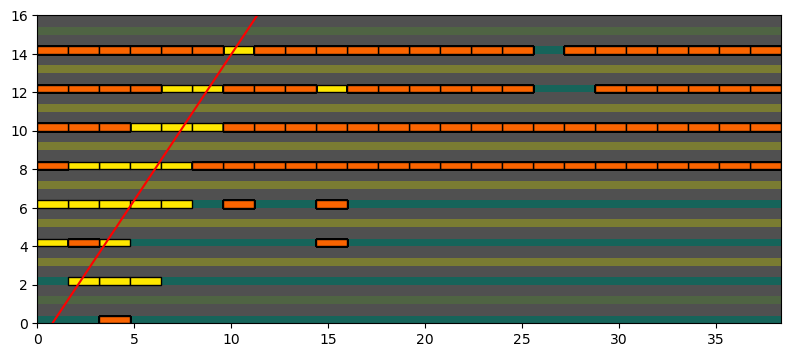

In [ ]:
time_intervals = np.loadtxt(data_storage+"time_intervals_"+run+".txt")
indices = np.loadtxt(data_storage+"events_indices_"+run+".txt").astype(int)
# large_time = []
# for i,t in enumerate(time_intervals):
#     if t>1400:
#         large_time.append(i)

# large_time_indices = indices[large_time]

%matplotlib inline

i = 6

kb = ""
while kb == "":
    # event = df_hits.loc[large_time_indices[i]]
    # next_event = df_hits_total.loc[large_time_indices[i]+1]
    event = df_hits.loc[indices[i]]
    next_event = df_hits_total.loc[indices[i]+1]

    hits = [Hit(event,i) for i in range(event['n_hits'
    
    ])]
    hitsX = [h for h in hits if h.is_sidex]
    hits_next_event = [Hit(next_event,i) for i in range(next_event['n_hits'])]
    hitsX_next_event = [h for h in hits_next_event if h.is_sidex]

    track = Track(hitsX)
    fig,ax = plot_hits(hits,True,True,scaling = 0.5,hits_next = hits_next_event)
    z = np.linspace(0,16)
    x = track.t*z+track.x0
    ax.plot(x,z,'r-')
    display.clear_output(wait=False)
    print("i = ", i)
    print(hits_next_event[0].timestamp_event-hits_next_event[0].timestamp-hits[-1].timestamp_event+hits[-1].timestamp)
    fig.savefig("fig_muon_decay_problem.pdf".format(i))
    display.display(fig)
    kb = input()
    i = i+1
display.clear_output(wait=False)


In [ ]:
fig.savefig("shower_section.pdf")